# Agrupamieno jerárquico por aglomeración
---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
url = 'https://bit.ly/2COHM14'
data = pd.read_csv( url )
data.head( 3 )

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844


In [3]:
# Escalamiento: normalize
from sklearn.preprocessing import normalize
data_norm = normalize( data )
data_norm = pd.DataFrame( data_norm, columns = data.columns )
data_norm.head( 3 )

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619


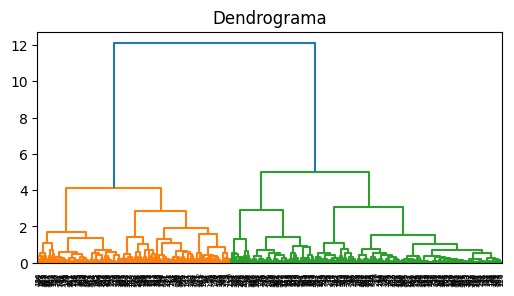

In [4]:
# Dendrograma
import scipy.cluster.hierarchy as sch
plt.figure( figsize = ( 6, 3 ) )
plt.title( 'Dendrograma' )
dend = sch.dendrogram( sch.linkage( data_norm, method = 'ward' ) )
plt.show()

In [5]:
# Sklearn
from sklearn.cluster import AgglomerativeClustering
ag = AgglomerativeClustering( n_clusters = 3, metric = 'euclidean', linkage = 'ward' )
y_pred = ag.fit_predict( data_norm )

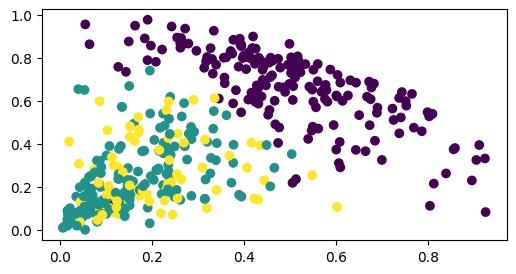

In [6]:
# Visualizaciones
plt.figure( figsize = ( 6, 3 ) )
plt.scatter( data_norm.Milk, data_norm.Grocery, c = y_pred )
plt.show()

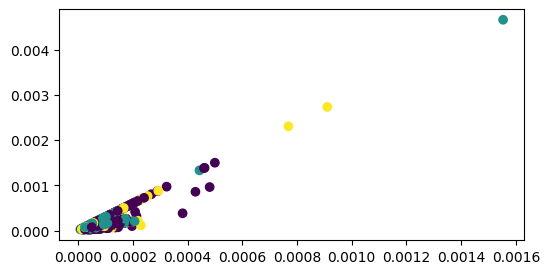

In [7]:
plt.figure( figsize = ( 6, 3 ) )
plt.scatter( data_norm.Channel, data_norm.Region, c = ag.labels_ )
plt.show()

In [8]:
# Ejemplo 2
df = pd.read_csv( 'https://bit.ly/3TUeh37' )
df.tail( 5 )

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [9]:
#Ingreso Anual & clasificación de gasto
X = df.iloc[ : , [ 3, 4 ] ].values

Text(0, 0.5, 'Distancia')

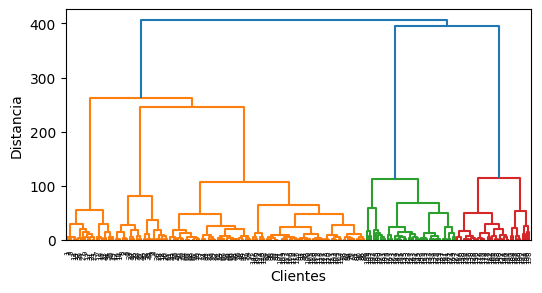

In [10]:
# Dendrograma
import scipy.cluster.hierarchy as sch
plt.figure( figsize = ( 6, 3 ) )
dend = sch.dendrogram( sch.linkage( X, method = 'ward' ) )
plt.xlabel( 'Clientes' )
plt.ylabel( 'Distancia' )

In [11]:
#Sklearn del dendrograma 3 grupos
from sklearn.cluster import AgglomerativeClustering
ag = AgglomerativeClustering( n_clusters = 3, metric = 'euclidean', linkage = 'ward' )
y_hc = ag.fit_predict( X )

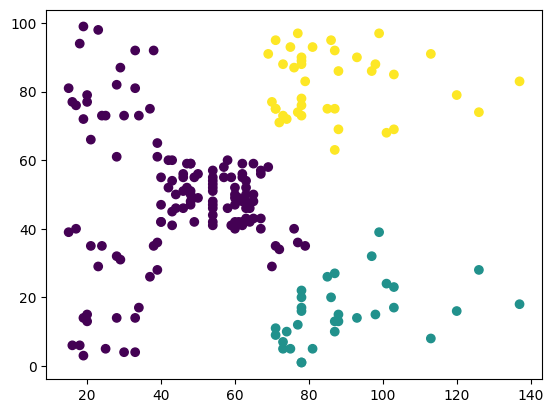

In [12]:
# Visualización
plt.scatter( X[ :, 0 ], X[ :, 1 ], c = y_hc )

In [13]:
#Sklearn del dendrograma, con interpretación de científico de datos: 5 grupos
from sklearn.cluster import AgglomerativeClustering
ag = AgglomerativeClustering( n_clusters = 5, metric = 'euclidean', linkage = 'ward' )
y_hc = ag.fit_predict( X )

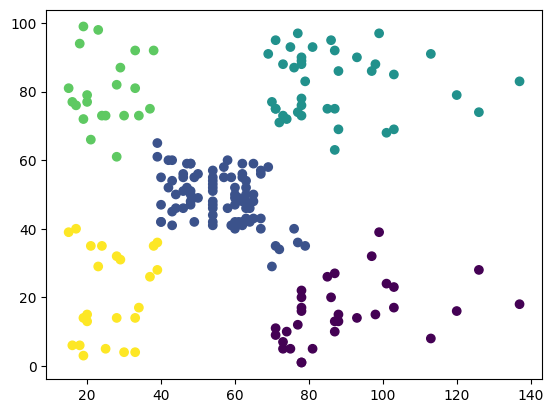

In [14]:
# Visualización
plt.scatter( X[ :, 0 ], X[ :, 1 ], c = y_hc )